In [2]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoLars, lars_path
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans



drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X.csv')
X_small = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_small.csv')
X_large = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_large.csv')
X_no_outlier = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/X_no_outlier.csv')

X = X.drop(columns = ['Unnamed: 0'])
X_small = X_small.drop(columns = ['Unnamed: 0'])
X_large = X_large.drop(columns = ['Unnamed: 0'])
X_no_outlier = X_no_outlier.drop(columns = ['Unnamed: 0'])

y = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y.csv')
y_small = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_small.csv')
y_large = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_large.csv')
y_no_outlier = pd.read_csv('/content/drive/My Drive/Flatiron/Capstone/y_no_outlier.csv')

y = y.drop(columns = ['Unnamed: 0'])
y_small = y_small.drop(columns = ['Unnamed: 0'])
y_large = y_large.drop(columns = ['Unnamed: 0'])
y_no_outlier = y_no_outlier.drop(columns = ['Unnamed: 0'])

## Linear Regression

In [4]:
linear_pipe = Pipeline(steps=[('logreg', LinearRegression())])


In [5]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X, y, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


27582854934.093353

In [6]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(linear_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


336668594237.4928

## Lasso Regression

In [7]:

lasso_pipe = Pipeline(steps=[('Lasso', Lasso(alpha = 1))])


scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X, y, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


431.6029161377866

## LARS Lasso

In [8]:
lars_pipe = Pipeline(steps=[('Lars', LassoLars(alpha = 1))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X, y, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae


431.6029161377866

In [9]:
lars_pipe = Pipeline(steps=[('Lars', LassoLars(alpha = 1))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

mae_scores = cross_val_score(lasso_pipe, X_no_outlier, y_no_outlier, cv=5, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

291.1884127813328

In [10]:
lars_model = LassoLars(alpha = 1)
lars_model.fit(X,y)

LassoLars(alpha=1)

.

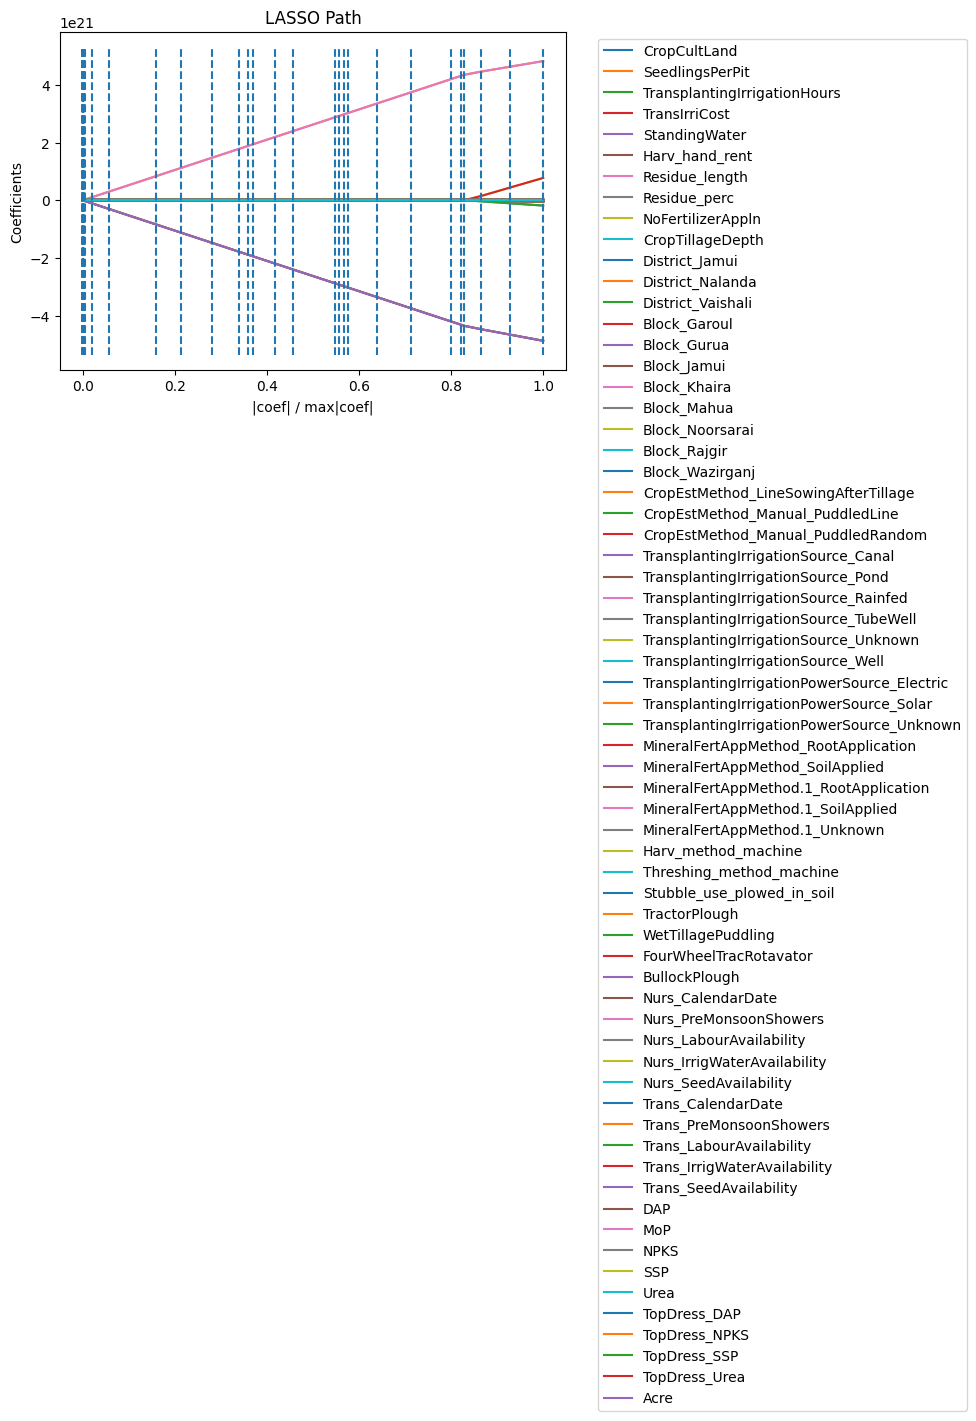

In [11]:
_, _, coefs = lars_path(X.to_numpy(), y.to_numpy().ravel(), method="lars", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X.columns
half_features = len(feature_names)//2


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


for i, feature_name in enumerate(feature_names):
    plt.plot(xx, coefs[i, :], label=feature_name)

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

.

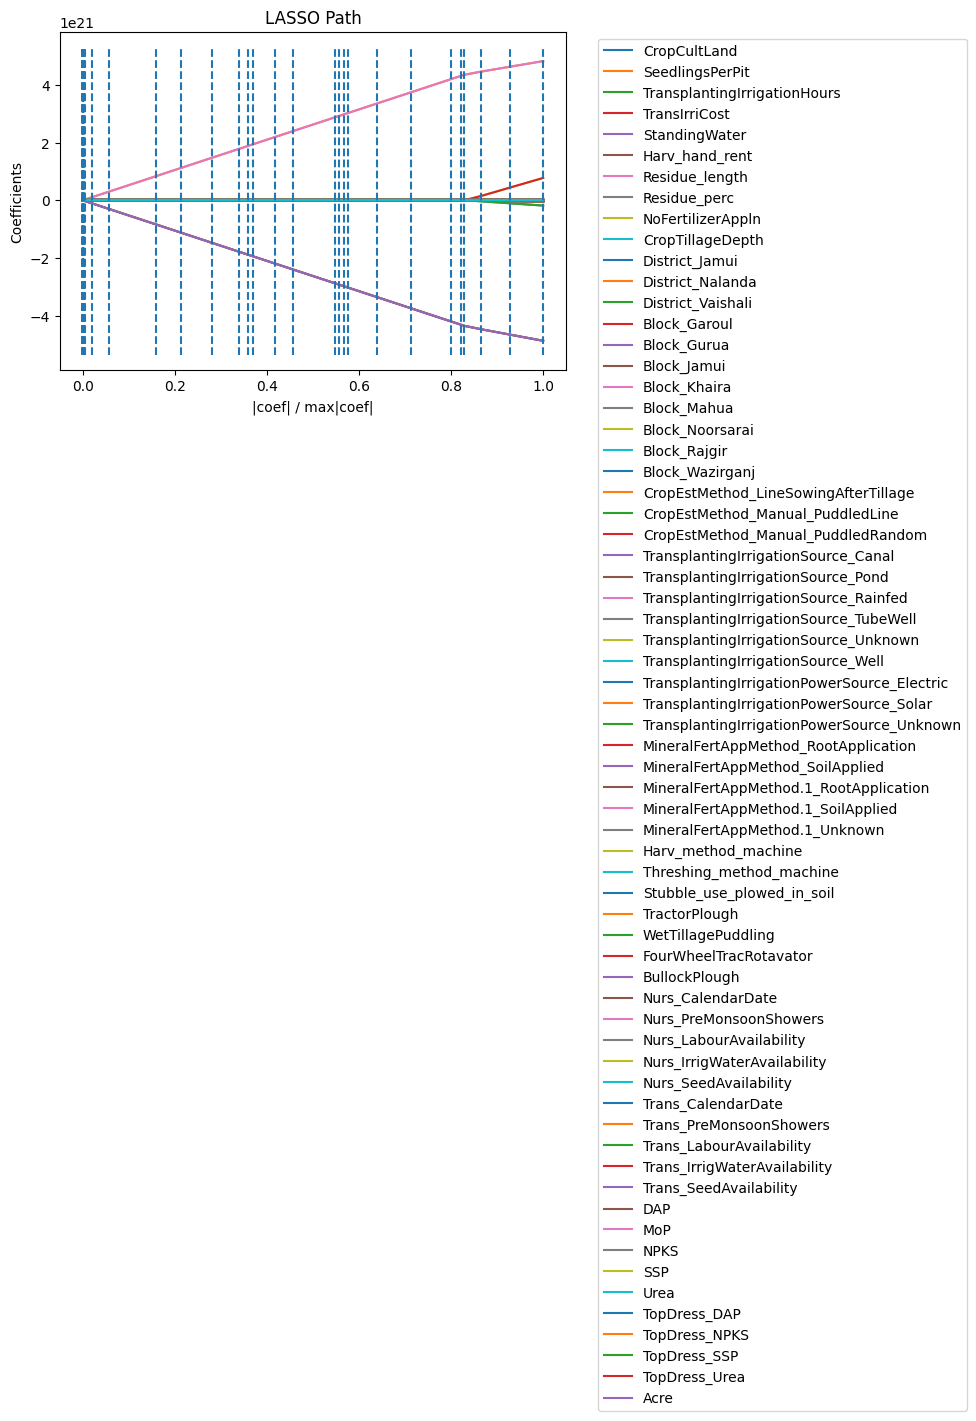

In [12]:
lars_model.fit(X_no_outlier,y_no_outlier)
_, _, coefs = lars_path(X.to_numpy(), y.to_numpy().ravel(), method="lars", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X.columns
half_features = len(feature_names)//2


fig, axs = plt.subplots(1, 1, figsize=(10, 10))


for i, feature_name in enumerate(feature_names):
    plt.plot(xx, coefs[i, :], label=feature_name)

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make room for the legend
plt.tight_layout()
plt.show()

.

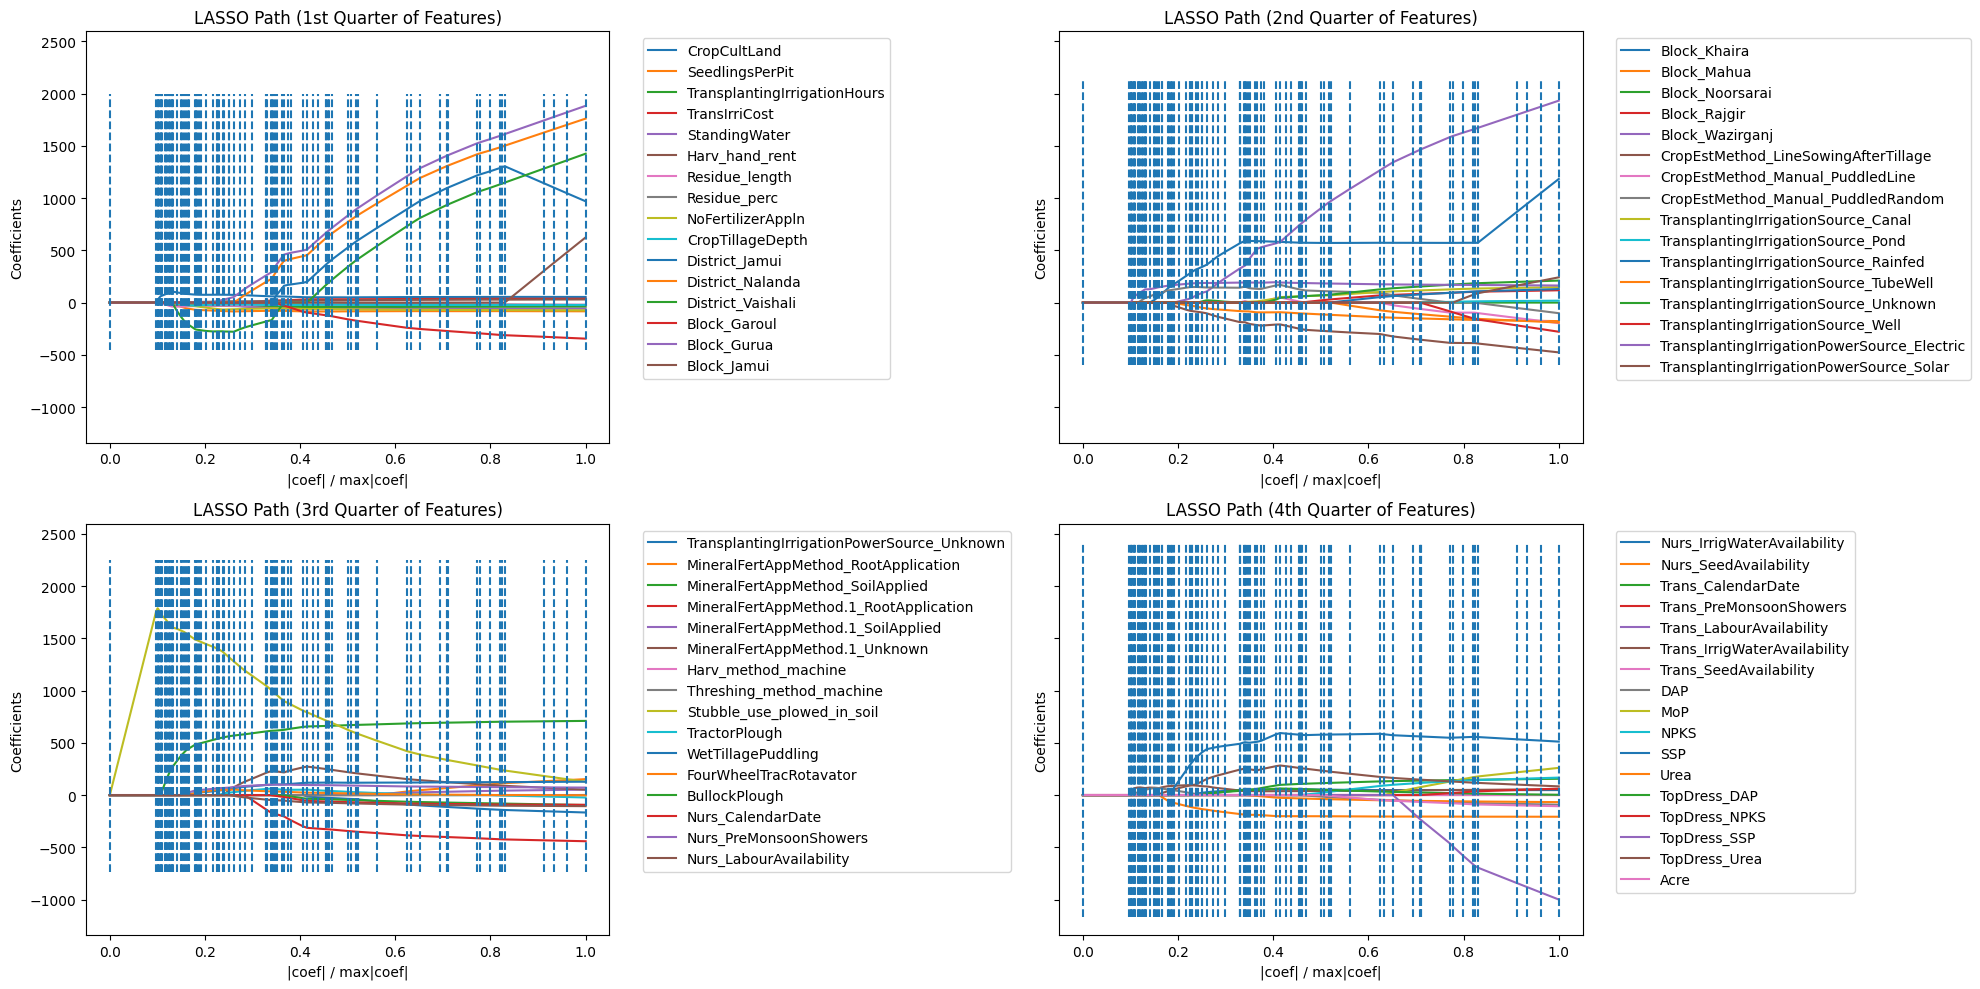

In [13]:
_, _, coefs = lars_path(X_no_outlier.to_numpy(), y_no_outlier.to_numpy().ravel(), method="lasso", verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]
feature_names = X_no_outlier.columns
n_features = len(feature_names)

quarter_n_features = n_features // 4

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharey=True)

def plot_quarter(ax, features_start, features_end, title):
    for i in range(features_start, features_end):
        ax.plot(xx, coefs[i, :], label=feature_names[i])
    ymin, ymax = ax.get_ylim()
    ax.vlines(xx, ymin, ymax, linestyle="dashed")
    ax.set_xlabel("|coef| / max|coef|")
    ax.set_ylabel("Coefficients")
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plot_quarter(axs[0, 0], 0, quarter_n_features, "LASSO Path (1st Quarter of Features)")
plot_quarter(axs[0, 1], quarter_n_features, 2 * quarter_n_features, "LASSO Path (2nd Quarter of Features)")
plot_quarter(axs[1, 0], 2 * quarter_n_features, 3 * quarter_n_features, "LASSO Path (3rd Quarter of Features)")
plot_quarter(axs[1, 1], 3 * quarter_n_features, n_features, "LASSO Path (4th Quarter of Features)")

plt.tight_layout()
plt.show()

## Random Forest

In [15]:
rf_pipe = Pipeline(steps=[('rf', RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error'))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X, y, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

293.28278202391294

In [16]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X_small, y_small, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

191.7618098110022

In [17]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

185.65275746914352

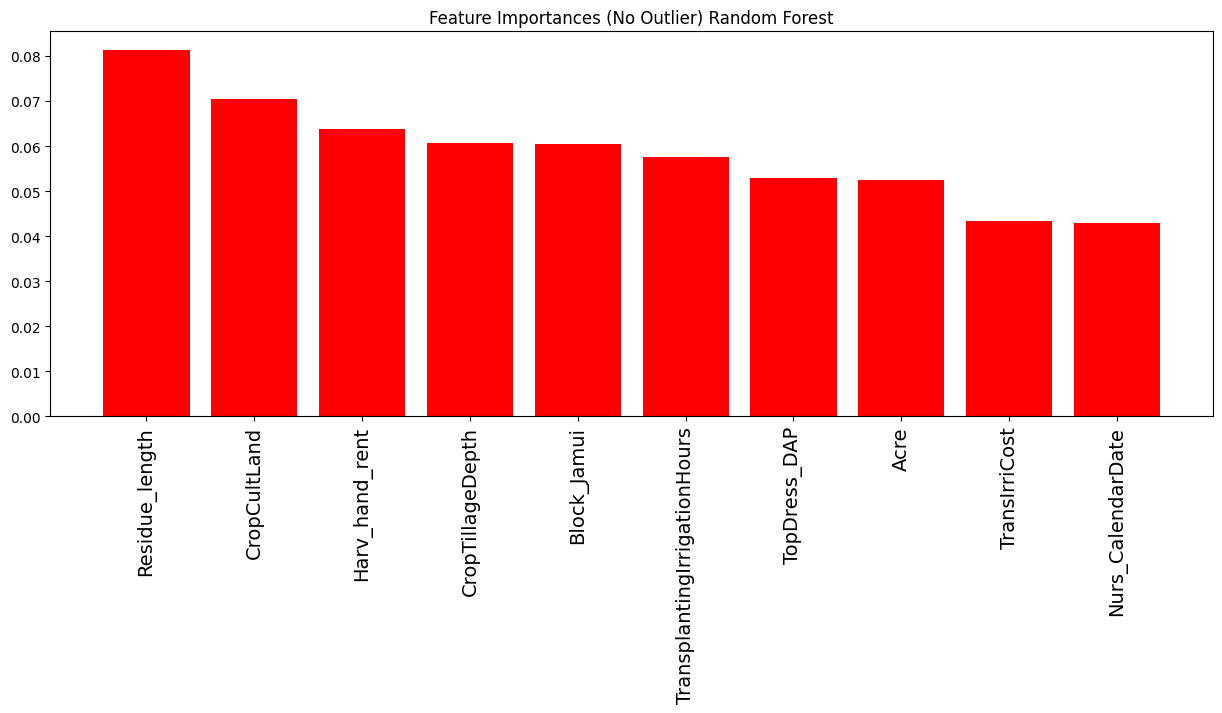

In [48]:
#regressor_no_outlier = RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error')

#regressor_no_outlier.fit(X_no_outlier, y_no_outlier)
importances = regressor_no_outlier.feature_importances_

# Sort them in descending order and select the top 10
sorted_indices = np.argsort(importances)[::-1]
top_sorted_indices = sorted_indices[:10]


# Get the top feature names if available (here using dummy names)
feature_names = X_no_outlier.columns
top_feature_names_no_outlier = feature_names[top_sorted_indices]

# Plotting
plt.figure(figsize=(15, 5))
plt.title("Feature Importances (No Outlier) Random Forest")
plt.bar(range(len(top_sorted_indices)), importances[top_sorted_indices], color="r", align="center")
plt.xticks(range(len(top_sorted_indices)), top_feature_names_no_outlier, rotation=90, fontsize = 14)

plt.show()

<ipython-input-19-f96b5b4890ff>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


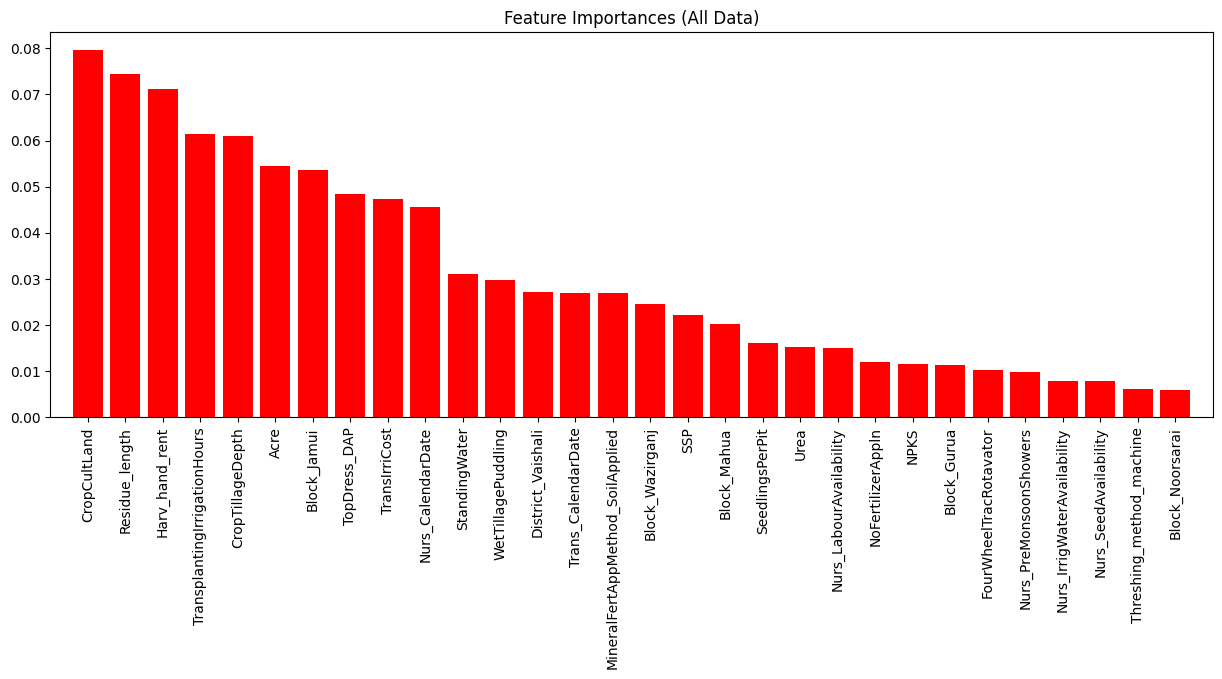

In [19]:
regressor = RandomForestRegressor(n_estimators=20, random_state=42, criterion = 'absolute_error')
regressor.fit(X, y)
importances = regressor.feature_importances_

# Sort them in descending order and select the top 10
sorted_indices = np.argsort(importances)[::-1]
top_sorted_indices = sorted_indices[:30]


# Get the top feature names if available (here using dummy names)
feature_names = X.columns
top_feature_names = feature_names[top_sorted_indices]

# Plotting
plt.figure(figsize=(15, 5))
plt.title("Feature Importances (All Data)")
plt.bar(range(len(top_sorted_indices)), importances[top_sorted_indices], color="r", align="center")
plt.xticks(range(len(top_sorted_indices)), top_feature_names, rotation=90)
plt.xlim([-1, len(top_sorted_indices)])
plt.show()



In [43]:
X_reduc_no_outlier = X_no_outlier[top_feature_names_no_outlier]


In [21]:
regressor = RandomForestRegressor(n_estimators=10, random_state=42, criterion = 'absolute_error')

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(regressor, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

194.28088159489388

In [22]:
param_grid = {
    'criterion': ['absolute_error'],
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [2, 10]
}
rf = RandomForestRegressor(random_state = 42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3)

grid_search.fit(X_no_outlier, y_no_outlier)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['absolute_error'], 'max_depth': [5, 10],
                         'min_samples_leaf': [2, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [23]:
rf_tuned_pipe = Pipeline(steps=[('rf', RandomForestRegressor(**grid_search.best_params_, random_state=42))])
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(rf_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py:405: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change th

185.65275746914352

## XGBoostRegressor

In [34]:
XGB_pipe = Pipeline(steps=[('XGB', XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(XGB_pipe, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

192.35562573235512

In [35]:
XGB_pipe = Pipeline(steps=[('XGB', XGBRegressor(n_estimators=50, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8))])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = cross_val_score(XGB_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores = -mae_scores

# Calculate the average MAE across all folds
mean_mae = mae_scores.mean()

mean_mae

187.97634650987567

## CatBoost

In [ ]:
!pip install catboost

In [26]:
from catboost import CatBoostRegressor

# Initialize the CatBoostRegressor with RMSE as the loss function
CBR_model = CatBoostRegressor(loss_function='MAE')
CBR_pipe = Pipeline(steps=[('Cat', CatBoostRegressor(loss_function='MAE'))])

In [ ]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_CBR_all = cross_val_score(CBR_pipe, X, y, cv=kf, scoring=scorer)

mae_scores_CBR_all = -mae_scores_CBR_all

# Calculate the average MAE across all folds
mean_mae_CBR_all = mae_scores_CBR_all.mean()

mean_mae_CBR_all

In [51]:
mean_mae_CBR_all

263.67115969580084

In [ ]:
scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_CBR_no_outlier = cross_val_score(CBR_pipe, X_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_CBR_no_outlier = -mae_scores_CBR_no_outlier

# Calculate the average MAE across all folds
mean_mae_CBR_no_outlier = mae_scores_CBR_no_outlier.mean()



In [53]:
mean_mae_CBR_no_outlier

179.3326998925905

In [ ]:
model_CBR = CatBoostRegressor()
parameters = {'loss_function': ['MAE'], 'learning_rate': [.001, .01, .1], 'depth': [10, 20, 40], 'iterations'    : [100, 200, 400]}

grid_cbr = GridSearchCV(estimator=model_CBR, param_grid = parameters, cv = 5, n_jobs=-1)

grid_cbr.fit(X_no_outlier, y_no_outlier)

In [31]:
grid_cbr.best_params_

{'depth': 10, 'iterations': 400, 'learning_rate': 0.1, 'loss_function': 'MAE'}

0:	learn: 335.2540840	total: 57.5ms	remaining: 23s
100:	learn: 120.7166136	total: 6.29s	remaining: 18.6s
200:	learn: 89.0999688	total: 9.29s	remaining: 9.2s
300:	learn: 75.2582848	total: 12.3s	remaining: 4.04s
399:	learn: 67.5041328	total: 14.9s	remaining: 0us


Text(0.5, 1.0, 'Feature Importance (No Outlier) CatBoost')

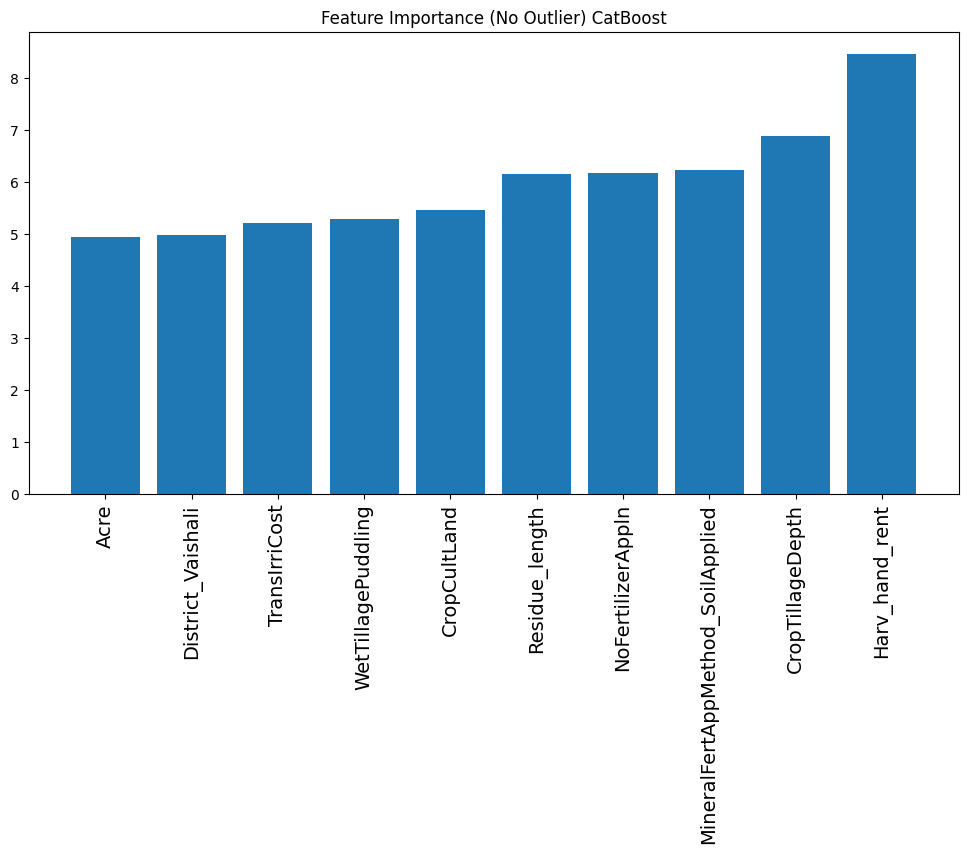

In [49]:
grid_cbr.best_estimator_.fit(X_no_outlier, y_no_outlier, verbose=100)
feature_importance = grid_cbr.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)[-10:]

fig = plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.xticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx], rotation='vertical', fontsize = 14)

plt.title('Feature Importance (No Outlier) CatBoost')

In [ ]:
CBR_pipe_best = Pipeline(steps=[('cbr', grid_cbr.best_estimator_)])

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_bestCBR_no_outlier = cross_val_score(CBR_pipe_best, X_reduc_no_outlier, y_no_outlier, cv=kf, scoring=scorer)

mae_scores_bestCBR_no_outlier = -mae_scores_bestCBR_no_outlier

# Calculate the average MAE across all folds
mean_mae_bestCBR_no_outlier = mae_scores_bestCBR_no_outlier.mean()



In [56]:
mean_mae_bestCBR_no_outlier

178.82871707670557